<a href="https://colab.research.google.com/github/vincm1/Car-price-prediction/blob/master/Car_Price_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Predictor

This Colaboratory will try to find an appropriate model to predict prices of used cars. The datasets used are from Kaggle and as follows:



*  Car Prediciton Challenge [19.237 entries] (https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge?datasetId=2322277&sortBy=voteCount)
*   Autouscout24 cars



In [1]:
from google.colab import drive
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car Price Predictor/datasets/car_price_prediction.csv', delimiter=",")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
print(f"There are {len(df)} car entries in the df")

There are 19237 car entries in the df


In [5]:
df.shape

(19237, 18)

In [6]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df['ID'].duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

# Data Cleaning and Preprocessing

In [9]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

In [10]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [11]:
# drop km in mileage
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage'] = df['Mileage'].astype('int64')

In [12]:
# replace doors
df['Doors'].replace({'04-May':'4-5', '02-Mar':'2-2'}, inplace=True)

In [13]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# Finding the rows which has turbo in them and assigning the results to new column Turbo.
df['Turbo'] = df['Engine volume'].str.contains('turbo')

# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')

In [14]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4-5,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,4-5,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4-5,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4-5,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4-5,Left wheel,Silver,4,False


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18924.0,4.557538e+07,9.375468e+05,20746880.0,45695007.50,45771914.5,45801742.25,4.581665e+07
Price,18924.0,1.858744e+04,1.921356e+05,1.0,5331.00,13172.0,22063.00,2.630750e+07
Levy,13215.0,9.062992e+02,4.632969e+02,87.0,640.00,781.0,1058.00,1.171400e+04
Prod. year,18924.0,2.010914e+03,5.665749e+00,1939.0,2009.00,2012.0,2015.00,2.020000e+03
Engine volume,18924.0,2.306251e+00,8.775910e-01,0.0,1.80,2.0,2.50,2.000000e+01
Mileage,18924.0,1.555373e+06,4.880221e+07,0.0,70195.75,126400.0,189119.75,2.147484e+09
Cylinders,18924.0,4.580216e+00,1.200223e+00,1.0,4.00,4.0,4.00,1.600000e+01
Airbags,18924.0,6.568379e+00,4.322323e+00,0.0,4.00,6.0,12.00,1.600000e+01


In [16]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [17]:
cars = df[['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo']].copy()

# EDA

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Prod. year'}>],
       [<Axes: title={'center': 'Engine volume'}>,
        <Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Airbags'}>, <Axes: >, <Axes: >]],
      dtype=object)

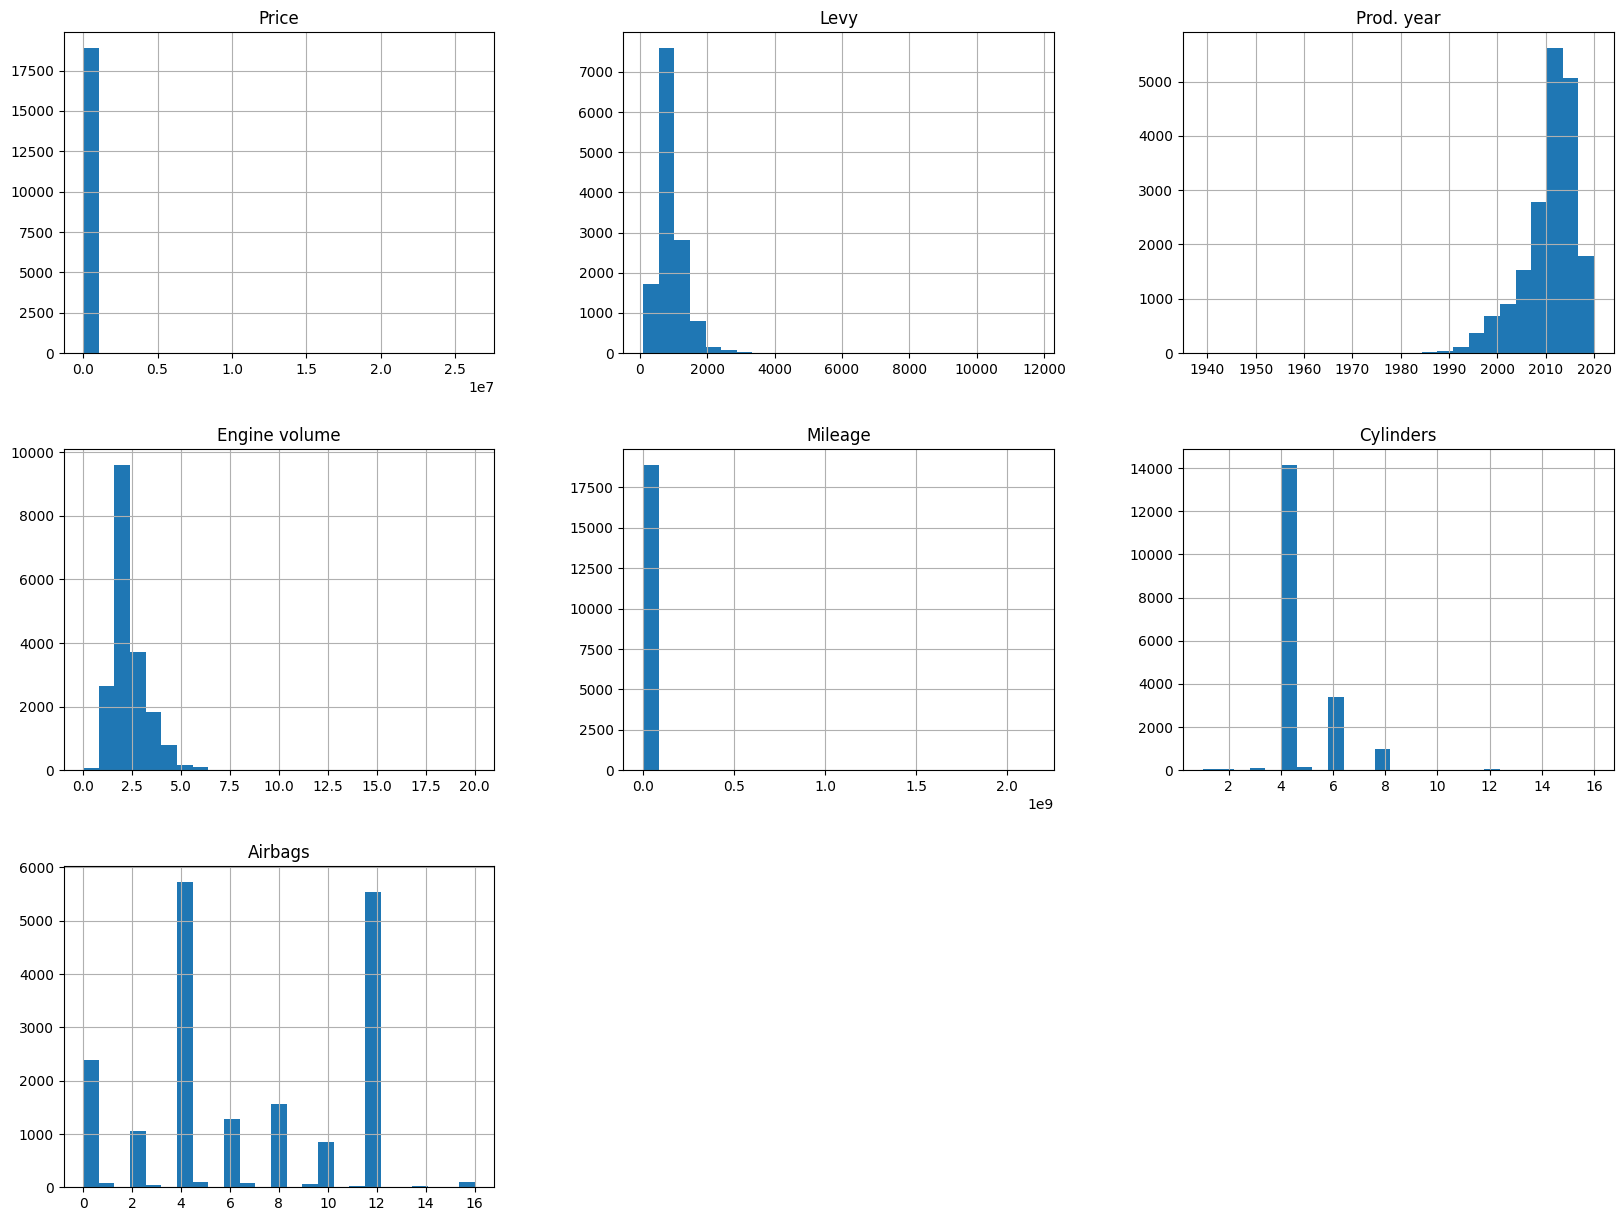

In [18]:
cars.hist(bins=25, figsize=(20,15))

###

In [39]:
print(f"Min price: {df.Price.min()}, Max price: {df.Price.max()} and range: {df.Price.max()-df.Price.min()}")

Min price: 1, Max price: 26307500 and range: 26307499


## Numeric Vars

### Levy
Levy is a tax related term. Tax of importing and exporting the cars.

<Axes: xlabel='Levy', ylabel='Density'>

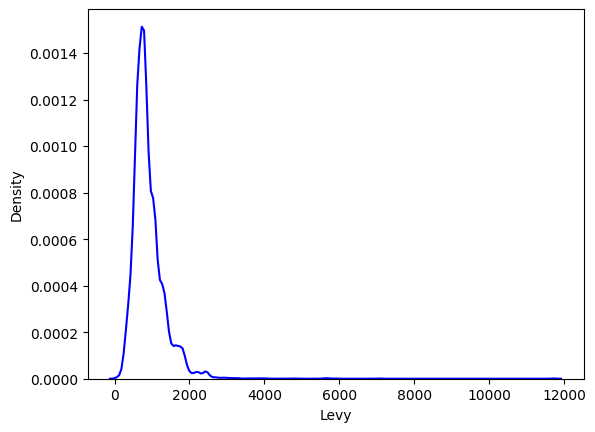

In [22]:
sns.kdeplot(df['Levy'], color='b')

### Airbags

<Axes: xlabel='Airbags', ylabel='Density'>

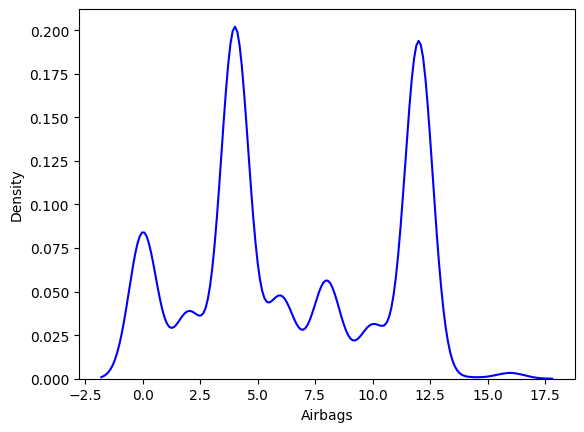

In [24]:
sns.kdeplot(df['Airbags'], color='b')

### Cylinders

<Axes: xlabel='Cylinders', ylabel='Density'>

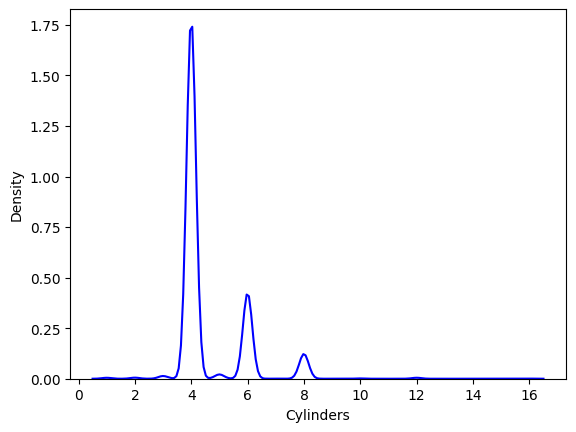

In [25]:
sns.kdeplot(df['Cylinders'], color='b')

## Categoric Vars

Text(0.5, 1.0, '# of Brand')

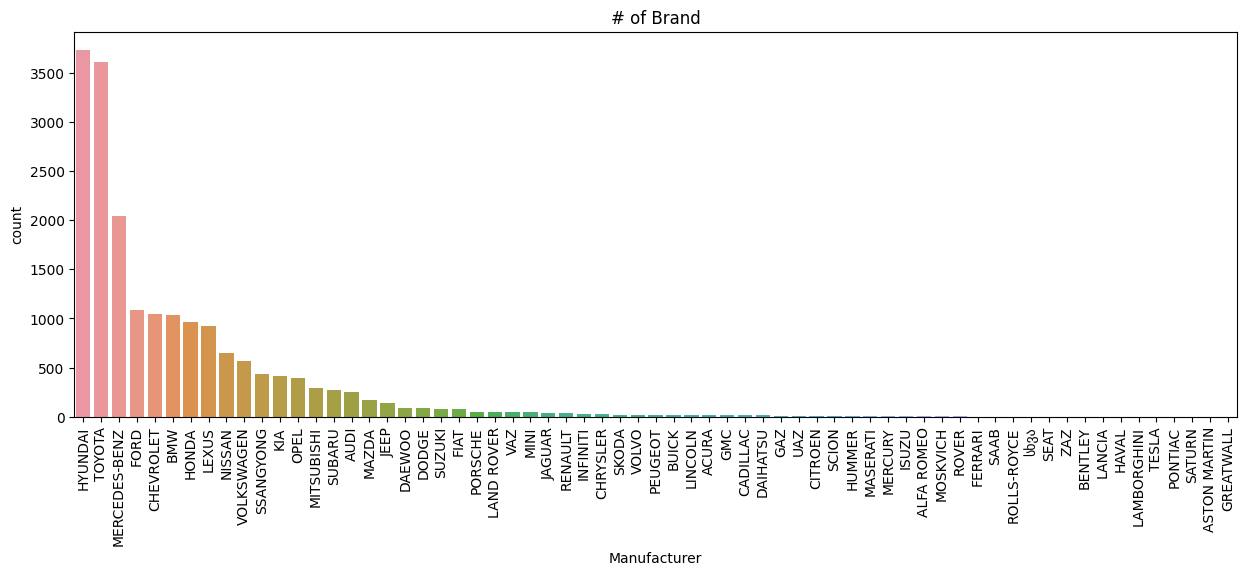

In [31]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = df['Manufacturer'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=df, x='Manufacturer', order=category_counts)
plt.xticks(rotation=90)
plt.title("# of Brand")

Text(0.5, 1.0, '# of type')

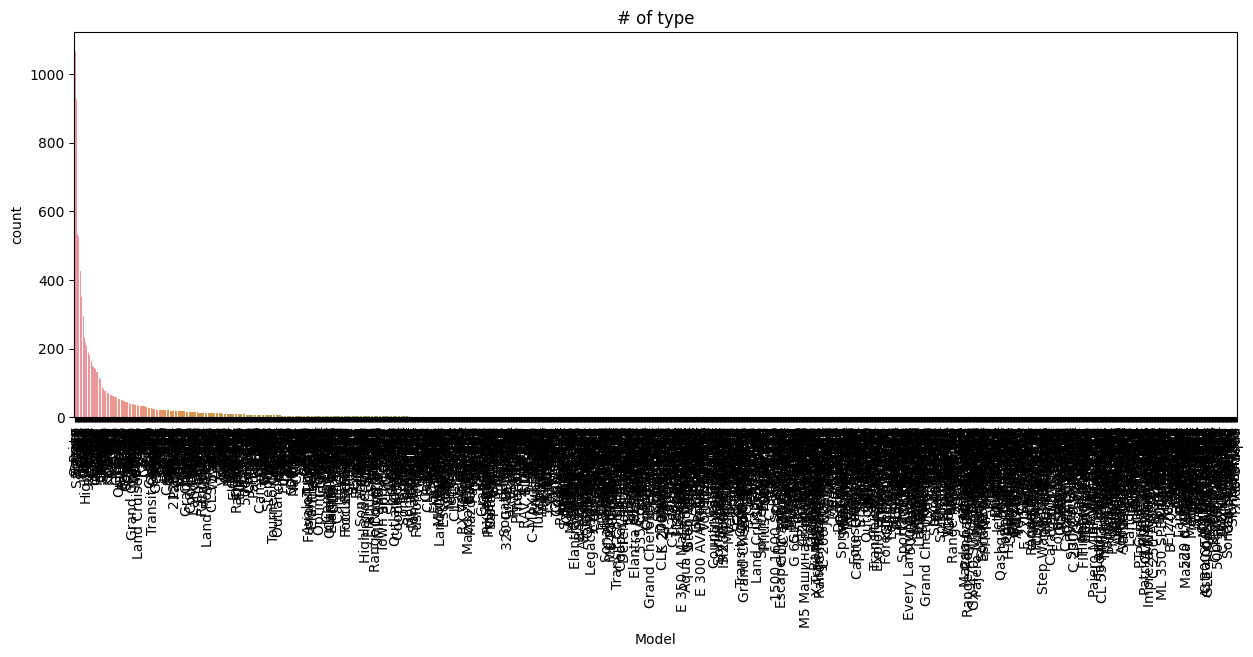

In [38]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = df['Model'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=df, x='Model', order=category_counts)
plt.xticks(rotation=90)
plt.title("# of Model")

Text(0.5, 1.0, '# of color')

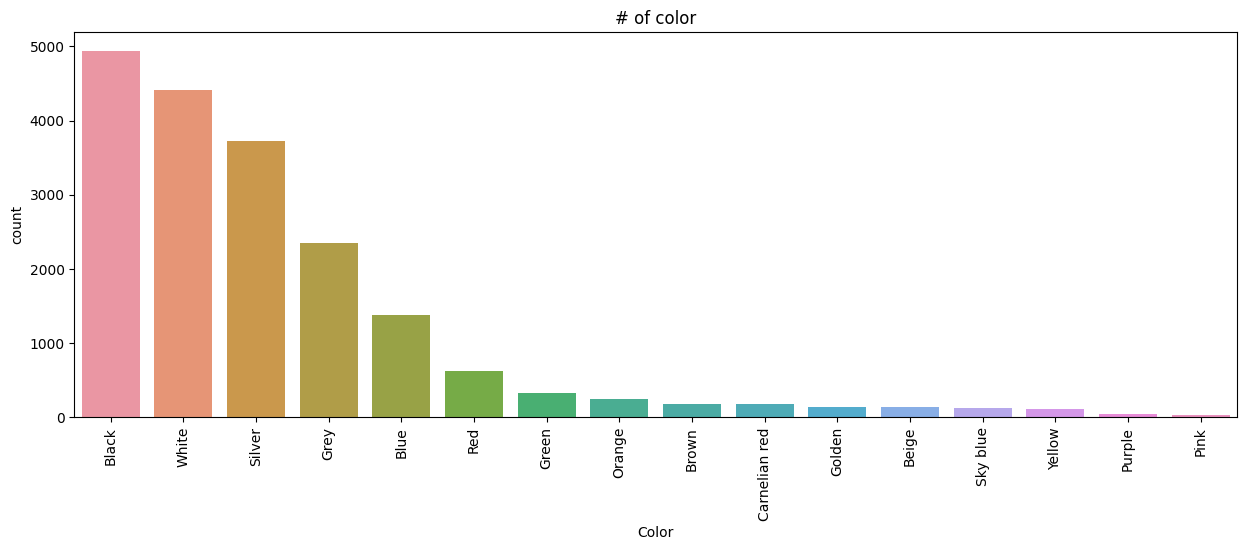

In [36]:
plt.figure(figsize=(15,5), dpi=100)
# First, get the count of each category in descending order
category_counts = df['Color'].value_counts().sort_values(ascending=False).index
# Create the countplot with the specified order
sns.countplot(data=df, x='Color', order=category_counts)
plt.xticks(rotation=90)
plt.title("# of color")